In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [5]:
y_pred = rf_model.predict(X_test)

In [6]:
accuracy_score(y_test, y_pred)

0.7489177489177489

TUNING

In [7]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [9]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [10]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [11]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [13]:
rf_tuned = RandomForestClassifier(max_depth= rf_cv_model.best_params_['max_depth'],
                                  max_features=rf_cv_model.best_params_['max_features'],
                                  n_estimators=rf_cv_model.best_params_['n_estimators'],
                                  min_samples_split=rf_cv_model.best_params_['min_samples_split'])
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, n_estimators=500)

In [14]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [15]:
importance = pd.DataFrame({"importance": rf_tuned.feature_importances_},
                          index=X_train.columns)

<Axes: >

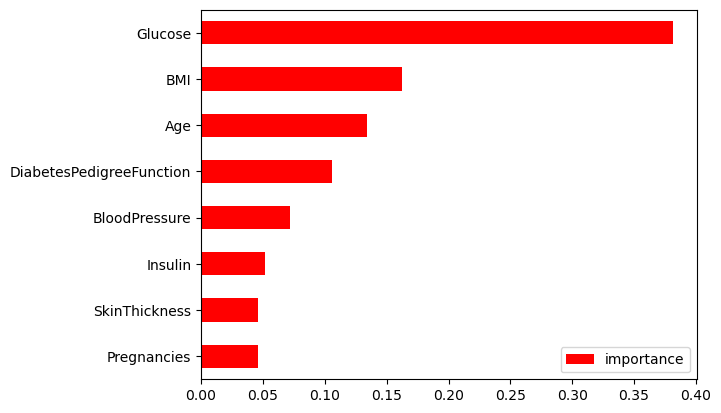

In [17]:
importance.sort_values(by="importance", ascending=True, axis=0).plot(kind="barh", color="r")